In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(xTrainSet, yTrainSet),(xTest, yTest) = fashion_mnist.load_data()

In [3]:
xTrainSet.shape, yTrainSet.shape, xTest.shape, yTest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


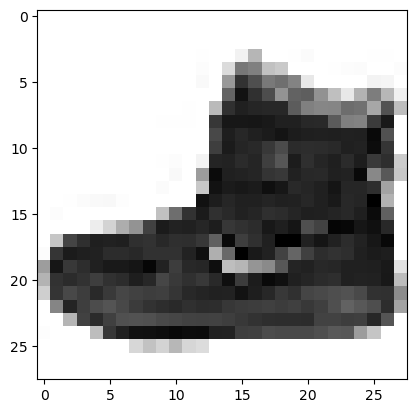

In [4]:
i = 0
print(yTrainSet[i])
plt.imshow(xTrainSet[i], cmap='binary')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xValid, yTrain, yValid = train_test_split(xTrainSet, yTrainSet, random_state=1)

In [6]:
xTrain = xTrain / 255.0
xValid = xValid / 255.0
xTest = xTest /255

Build Model

In [7]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [8]:
model= Sequential([
    Flatten(input_shape=xTrain.shape[1:]),
    Dense(units=300, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Train

In [11]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.7825 - accuracy: 0.7422 - val_loss: 0.6101 - val_accuracy: 0.7925
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5050 - accuracy: 0.8240 - val_loss: 0.5333 - val_accuracy: 0.8088
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4521 - accuracy: 0.8405 - val_loss: 0.4675 - val_accuracy: 0.8325
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4204 - accuracy: 0.8515 - val_loss: 0.4298 - val_accuracy: 0.8487
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3987 - accuracy: 0.8593 - val_loss: 0.8713 - val_accuracy: 0.6851
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3796 - accuracy: 0.8668 - val_loss: 0.5947 - val_accuracy: 0.8014
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3623 - accuracy: 0.8706 - val_loss: 0.3942 - val_accuracy:

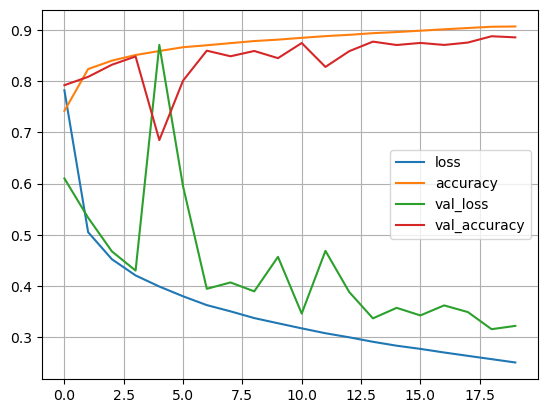

In [12]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

Evaluate

In [13]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 0s 630us/step - loss: 0.3518 - accuracy: 0.8748


[0.3518461287021637, 0.8748000264167786]

Predict

In [14]:
yProba = model.predict(xTest)
yProba[:3].round(2)

313/313 [==============================] - 0s 605us/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [15]:
yPred = np.argmax(yProba, axis=1)
yPred[:3]

array([9, 2, 1])

In [16]:
yTest[:3]

array([9, 2, 1], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yTest, yPred)

array([[813,   0,  13,  36,   4,   2, 119,   0,  13,   0],
       [  3, 963,   0,  25,   3,   0,   5,   0,   1,   0],
       [ 13,   1, 767,  20,  87,   0, 108,   0,   4,   0],
       [ 14,   5,   7, 924,  17,   0,  26,   0,   7,   0],
       [  0,   1,  91,  63, 757,   0,  81,   0,   7,   0],
       [  0,   0,   0,   1,   0, 945,   0,  41,   2,  11],
       [101,   1,  65,  34,  54,   0, 724,   0,  21,   0],
       [  0,   0,   0,   0,   0,  15,   0, 975,   1,   9],
       [  2,   0,   2,   8,   3,   2,   3,   6, 974,   0],
       [  0,   0,   0,   0,   0,  15,   1,  78,   0, 906]])